In [1]:
class MyLinearRegression:
    def __init__(self,weight=1,bias=2,learning_rate=0.0005,iteration=80):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.cost_trend = []
        self.cost = 0
    def predict(self,x):
        predictor_set = []
        for i in x:
            predicted_value = self.weight*i+self.bias
            predictor_set.append(predicted_value)
        return predictor_set
    def cost_function(self,x,y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error+=(y[i]-(self.weight*x[i]+self.bias))**2
        return float(total_error)/(2*count)
    def update_weight(self,x,y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)
        for i in range(count):
            weight_deriv += -2* x[i] * (y[i]-self.weight*i+self.bias)
            bias_deriv += -2 * (y[i]-self.weight*i+self.bias)
        self.weight -= (weight_deriv/count) * self.learning_rate
        self.bias -= (bias_deriv/count) * self.learning_rate
    def train(self,x,y):
        for i in range(self.iteration):
            self.update_weight(x,y)
            self.cost = self.cost_function(x,y)
            self.cost_trend.append(self.cost)
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

X = studentscores.iloc[:,:-1].values
Y = studentscores.iloc[:,-1].values
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

regressor = MyLinearRegression()
regressor.train(X_train,Y_train)
print('Weight: '+str(regressor.weight)+ 'Bias: '+str(regressor.bias))

Y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [1.314175]	 Bias: 2.048125	 Cost: 1233.6152233527653
Iteration: 1	 Weight: [1.61590334]	 Bias: [2.09394181]	 Cost: 1146.1847430075725
Iteration: 2	 Weight: [1.90567599]	 Bias: [2.13754148]	 Cost: 1065.3002249782
Iteration: 3	 Weight: [2.18396457]	 Bias: [2.17901145]	 Cost: 990.4629785294228
Iteration: 4	 Weight: [2.45122208]	 Bias: [2.21843573]	 Cost: 921.2126286573981
Iteration: 5	 Weight: [2.70788368]	 Bias: [2.255895]	 Cost: 857.1241609872699
Iteration: 6	 Weight: [2.95436733]	 Bias: [2.29146677]	 Cost: 797.8051949606225
Iteration: 7	 Weight: [3.19107452]	 Bias: [2.32522548]	 Cost: 742.8934676644916
Iteration: 8	 Weight: [3.41839089]	 Bias: [2.35724264]	 Cost: 692.0545120183476
Iteration: 9	 Weight: [3.6366869]	 Bias: [2.38758695]	 Cost: 644.9795142946457
Iteration: 10	 Weight: [3.84631835]	 Bias: [2.41632439]	 Cost: 601.3833371103058
Iteration: 11	 Weight: [4.04762704]	 Bias: [2.44351833]	 Cost: 561.0026950984363
Iteration: 12	 Weight: [4.24094128]	 Bias: [2.4

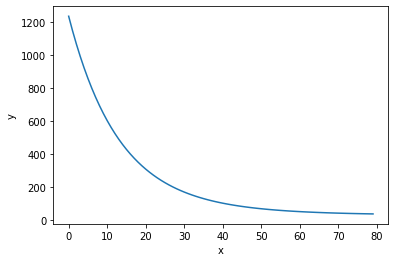

In [5]:
x=[int(x) for x in range(80)]
y=regressor.cost_trend
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

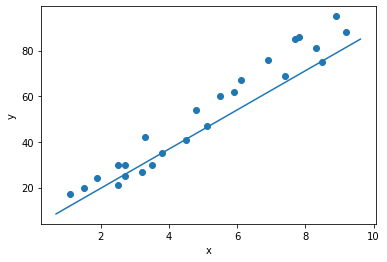

In [6]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()